In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")


In [2]:
q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
query = "SELECT * FROM facts LIMIT 5"

pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [4]:
query_min = "Select min(population) from facts"
query_max = "Select max(population) from facts"
query_min_growth="Select min(population_growth) from facts"
query_max_growth="Select max(population_growth) from facts"

In [5]:
pd.read_sql_query(query_min,conn)

,min(population)
0,0


In [6]:
pd.read_sql_query(query_max,conn)

,max(population)
0,7256490011


In [7]:
pd.read_sql_query(query_min_growth,conn)

,min(population_growth)
0,0.0


In [8]:
pd.read_sql_query(query_max_growth,conn)

,max(population_growth)
0,4.02


In [9]:
query_max_pop = "Select Name from facts where population = (Select max(population) from facts)"
query_min_pop = "Select Name from facts where population = (Select min(population) from facts)"

In [10]:
pd.read_sql_query(query_max_pop,conn)

,name
0,World


In [11]:
pd.read_sql_query(query_min_pop,conn)

,name
0,Antarctica


In [12]:
query_outliers = "select * from facts "
query_outliers += "where population != (Select max(population) from facts)"
query_outliers += "and population != (Select min(population) from facts)"


In [19]:
world_data = pd.read_sql_query(query_outliers,conn)

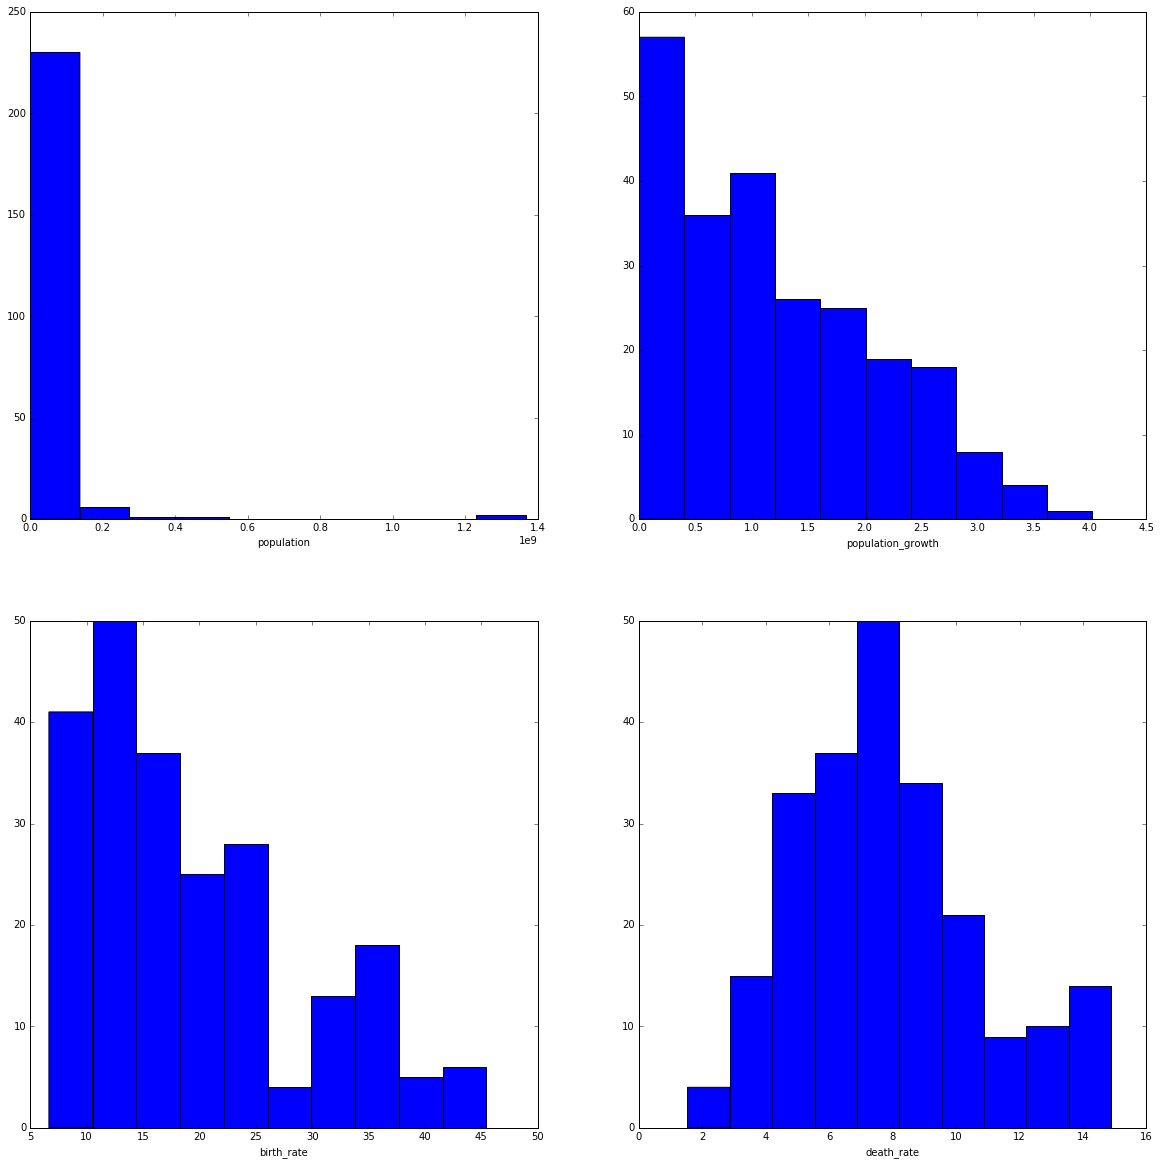

In [50]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

abscisse = np.arange(0,world_data['population'].count(),1)

graphs = ['population','population_growth','birth_rate','death_rate']
axes = [ax1,ax2,ax3,ax4]

for graph,axe in zip(graphs,axes):
    
    axe.hist(world_data[graph].dropna())
    axe.set_xlabel(graph)
plt.show()


In [51]:
query_outliers = "select population,population_growth,birth_rate,death_rate from facts "
query_outliers += "where population != (Select max(population) from facts)"
query_outliers += "and population != (Select min(population) from facts)"


In [52]:
world_data = pd.read_sql_query(query_outliers,conn)

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


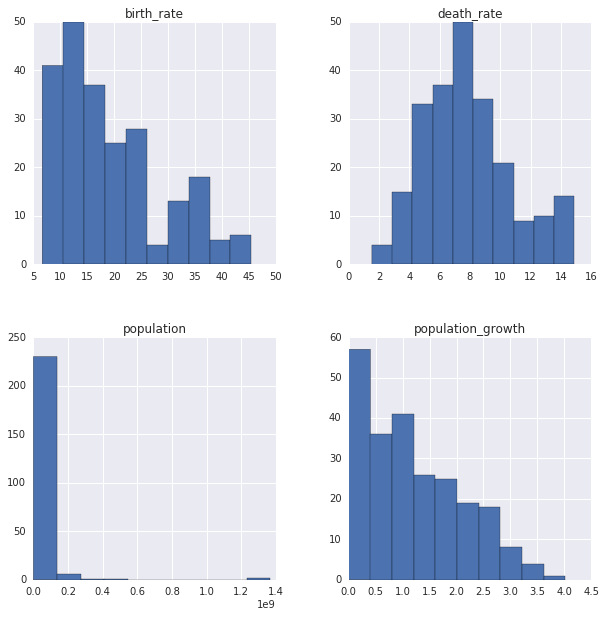

In [62]:
import seaborn
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

world_data.hist(ax=ax)
plt.show()

In [64]:
query_outliers = "select population/area_land as density from facts "
query_outliers += "where population != (Select max(population) from facts)"
query_outliers += "and population != (Select min(population) from facts)"

world_data = pd.read_sql_query(query_outliers,conn)

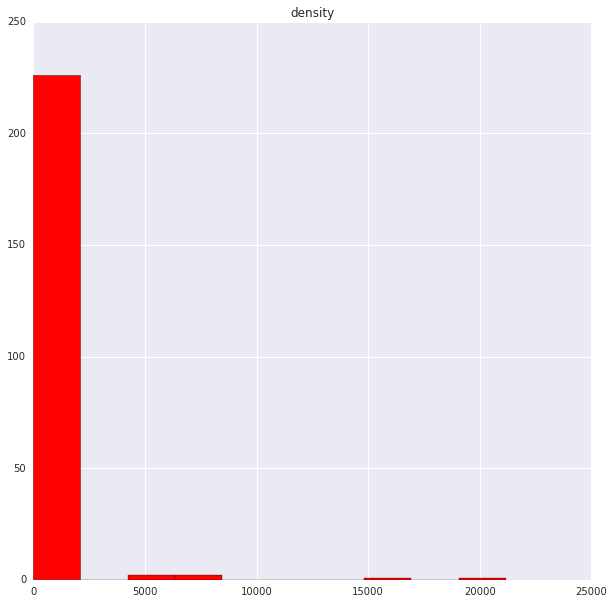

In [66]:
import seaborn
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

world_data.hist(ax=ax,color='red')
plt.show()

In [71]:
query_outliers = "select name, cast(area_water as float)/cast(area_land as float) as water_land_ratio from facts "
query_outliers += "where population != (Select max(population) from facts)"
query_outliers += "and population != (Select min(population) from facts)"
query_outliers += " order by water_land_ratio DESC"

world_data = pd.read_sql_query(query_outliers,conn)

In [72]:
world_data

,name,water_land_ratio
0,Virgin Islands,4.520231
1,Puerto Rico,0.554791
2,"Bahamas, The",0.386613
3,Guinea-Bissau,0.284673
4,Malawi,0.259396
5,Netherlands,0.225710
6,Uganda,0.222922
7,Eritrea,0.164356
8,Liberia,0.156240
9,Bangladesh,0.140509


In [74]:
query_outliers = "select name, cast(area_water as float)/cast(area_land as float) as water_land_ratio from facts "
query_outliers += "where (cast(area_water as float)/cast(area_land as float)) > 1 "
query_outliers += " order by water_land_ratio DESC"

world_data = pd.read_sql_query(query_outliers,conn)

In [75]:
world_data

,name,water_land_ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
